# Dumbell Charts
## When to use a dumbell chart

 * To show the difference between two groups across one variable.

## Style tips



In [1]:
library(ggplot2) 
library(ggalt)   
library(tidyverse)

Registered S3 methods overwritten by 'ggalt':
  method                  from   
  grid.draw.absoluteGrob  ggplot2
  grobHeight.absoluteGrob ggplot2
  grobWidth.absoluteGrob  ggplot2
  grobX.absoluteGrob      ggplot2
  grobY.absoluteGrob      ggplot2

── Attaching packages ──────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ─────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
disrupted <- readr::read_csv("../_static/data/will-disrupt-life.csv")


── Column specification ─────────────────────────────────────────────────────────────────────────
cols(
  concerned = col_character(),
  total = col_double(),
  rep = col_double(),
  dem = col_double(),
  ind = col_double(),
  men = col_double(),
  women = col_double(),
  `18-34` = col_double(),
  `35-49` = col_double(),
  `50-64` = col_double(),
  `65+` = col_double()
)




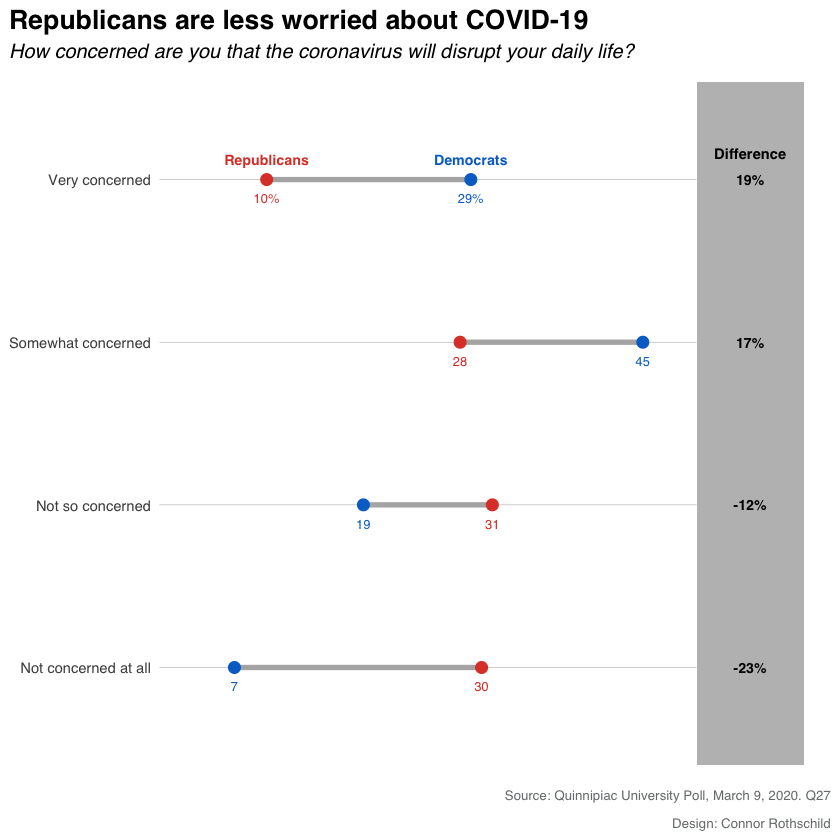

In [3]:
disrupted <- disrupted %>% 
  mutate_if(is.numeric, function(x) {x/100}) %>% 
  mutate(diff = dem - rep)

percent_first <- function(x) {
  x <- sprintf("%d%%", round(x*100))
  x[2:length(x)] <- sub("%$", "", x[2:length(x)])
  x
}

blue <- "#0171CE"
red <- "#DE4433"

ggplot() +
  # doing this vs y axis major grid line
  geom_segment(data=disrupted, aes(y=concerned, yend=concerned, x=0, xend=.5), color="#b2b2b2", size=0.15) +
  ggalt::geom_dumbbell(data=disrupted, aes(y=concerned, x=rep, xend=dem),
                       size=1.5, color="#b2b2b2", size_x=3, size_xend = 3,
                       colour_x=red, colour_xend =blue) +
  # text below points
  geom_text(data=filter(disrupted, concerned=="Very concerned"),
            aes(x=dem, y=concerned, label="Democrats"),
            color=blue, size=3, vjust=-1.5, fontface="bold", family="Helvetica") +
  geom_text(data=filter(disrupted, concerned=="Very concerned"),
            aes(x=rep, y=concerned, label="Republicans"),
            color=red, size=3, vjust=-1.5, fontface="bold", family="Helvetica") +
  # text above points
  geom_text(data=disrupted, aes(x=rep, y=concerned, label=percent_first(rep)),
            color=red, size=2.75, vjust=2.5, family="Helvetica") +
  geom_text(data=disrupted, color=blue, size=2.75, vjust=2.5, family="Helvetica",
            aes(x=dem, y=concerned, label=percent_first(dem))) +
  # difference column
  geom_rect(data=disrupted, aes(xmin=.5, xmax=.6, ymin=-Inf, ymax=Inf), fill="grey") +
  geom_text(data=disrupted, aes(label=paste0(diff*100, "%"), y=concerned, x=.55), fontface="bold", size=3, family="Helvetica") +
  geom_text(data=filter(disrupted, concerned=="Very concerned"), aes(x=.55, y=concerned, label="Difference"),
            color="black", size=3.1, vjust=-2, fontface="bold", family="Helvetica") +
  scale_x_continuous(expand=c(0,0), limits=c(0, .625)) +
  scale_y_discrete(expand=c(0.2,0)) +
  labs(x=NULL, y=NULL, title="Republicans are less worried about COVID-19",
       subtitle="How concerned are you that the coronavirus will disrupt your daily life?",
       caption="Source: Quinnipiac University Poll, March 9, 2020. Q27\n\nDesign: Connor Rothschild") +
  theme_bw(base_family="Helvetica") +
  theme(
    panel.grid.major=element_blank(),
    panel.grid.minor=element_blank(),
    panel.border=element_blank(),
    axis.ticks=element_blank(),
    axis.text.x=element_blank(),
    plot.title=element_text(size = 16, face="bold"),
    plot.title.position = "plot",
    plot.subtitle=element_text(face="italic", size=12, margin=margin(b=12)),
    plot.caption=element_text(size=8, margin=margin(t=12), color="#7a7d7e")
  )